In [1]:
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [3]:
#Check that there are no missing data
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [5]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))
 
 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [6]:
#1)With optuna method and using train data  choose best method among Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier"
#and optimeze these method based on following parameters.
#max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
#max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
#Evaluate performance of the best method on test data using eval function defined above.
#Note: This should be similar to what we have done in the exercises in class. 

In [7]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier


import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm

In [8]:
def objective(trial):
    x ,y =X_train, y_train
    
    classifier_name = trial.suggest_categorical("classifier", ["Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier" ])
    if classifier_name == "Random Forest":
         from sklearn.ensemble import RandomForestClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.RandomForestClassifier(random_state=0,  max_depth=max_depth, max_features=max_features )
        
         

    elif classifier_name == "XGBoost":
         from xgboost import XGBClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = XGBClassifier(random_state=0,  max_depth=max_depth, max_features=max_features )
        
         

    elif classifier_name == "LightGBM":
         import lightgbm as lgb
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = lgb.LGBMClassifier(random_state=0,  max_depth=max_depth, max_features=max_features )
        
       
       
    else:
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.GradientBoostingClassifier(random_state=0,  max_depth=max_depth, max_features=max_features )
    
    # Train and evaluate the classifier
    classifier_obj.fit(x, y)
    y_pred = classifier_obj.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

    # Store the trained classifier as a user attribute of the trial if it achieves the best performance
    if trial.should_prune() or accuracy < 0.5:
        return float('inf')
    trial.set_user_attr("best_classifier", classifier_obj)
    return 1 - accuracy

In [9]:
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2023-04-15 01:32:27,875] A new study created in memory with name: no-name-8b3b2c59-848b-438e-aa20-6acf65968bb6
[I 2023-04-15 01:32:28,655] Trial 0 finished with value: 0.08585858585858586 and parameters: {'classifier': 'Random Forest', 'max_depth': 8, 'max_features': 23}. Best is trial 0 with value: 0.08585858585858586.
[I 2023-04-15 01:32:30,663] Trial 1 finished with value: 0.06565656565656564 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 10, 'max_features': 15}. Best is trial 0 with value: 0.08585858585858586.
[I 2023-04-15 01:32:31,256] Trial 2 finished with value: 0.07828282828282829 and parameters: {'classifier': 'Random Forest', 'max_depth': 31, 'max_features': 8}. Best is trial 0 with value: 0.08585858585858586.
[I 2023-04-15 01:32:31,359] Trial 3 finished with value: 0.06746031746031744 and parameters: {'classifier': 'LightGBM', 'max_depth': 6, 'max_features': 28}. Best is trial 0 with value: 0.08585858585858586.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:36,442] Trial 4 finished with value: 0.07178932178932174 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 14, 'max_features': 17}. Best is trial 0 with value: 0.08585858585858586.
[I 2023-04-15 01:32:41,634] Trial 5 finished with value: 0.08441558441558439 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 17, 'max_features': 34}. Best is trial 0 with value: 0.08585858585858586.
[I 2023-04-15 01:32:42,247] Trial 6 finished with value: 0.08152958152958156 and parameters: {'classifier': 'Random Forest', 'max_depth': 11, 'max_features': 12}. Best is trial 0 with value: 0.08585858585858586.
[I 2023-04-15 01:32:43,767] Trial 7 finished with value: 0.07792207792207795 and parameters: {'classifier': 'Random Forest', 'max_depth': 31, 'max_features': 33}. Best is trial 0 with value: 0.08585858585858586.


[01:32:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2023-04-15 01:32:44,223] Trial 8 finished with value: 0.06998556998557004 and parameters: {'classifier': 'XGBoost', 'max_depth': 15, 'max_features': 7}. Best is trial 0 with value: 0.08585858585858586.
[I 2023-04-15 01:32:46,429] Trial 9 finished with value: 0.06782106782106778 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 9, 'max_features': 30}. Best is trial 0 with value: 0.08585858585858586.


[01:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2023-04-15 01:32:46,899] Trial 10 finished with value: 0.0670995670995671 and parameters: {'classifier': 'XGBoost', 'max_depth': 23, 'max_features': 23}. Best is trial 0 with value: 0.08585858585858586.
[I 2023-04-15 01:32:46,955] Trial 11 finished with value: 0.09090909090909094 and parameters: {'classifier': 'LightGBM', 'max_depth': 2, 'max_features': 23}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:47,011] Trial 12 finished with value: 0.09090909090909094 and parameters: {'classifier': 'LightGBM', 'max_depth': 2, 'max_features': 23}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:47,085] Trial 13 finished with value: 0.07287157287157287 and parameters: {'classifier': 'LightGBM', 'max_depth': 4, 'max_features': 23}. Best is trial 11 with value: 0.09090909090909094.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:47,143] Trial 14 finished with value: 0.09090909090909094 and parameters: {'classifier': 'LightGBM', 'max_depth': 2, 'max_features': 21}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:47,265] Trial 15 finished with value: 0.06637806637806642 and parameters: {'classifier': 'LightGBM', 'max_depth': 21, 'max_features': 28}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:47,329] Trial 16 finished with value: 0.07647907647907648 and parameters: {'classifier': 'LightGBM', 'max_depth': 3, 'max_features': 19}. Best is trial 11 with value: 0.09090909090909094.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:47,454] Trial 17 finished with value: 0.06637806637806642 and parameters: {'classifier': 'LightGBM', 'max_depth': 25, 'max_features': 26}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:47,558] Trial 18 finished with value: 0.06746031746031744 and parameters: {'classifier': 'LightGBM', 'max_depth': 6, 'max_features': 4}. Best is trial 11 with value: 0.09090909090909094.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:47,685] Trial 19 finished with value: 0.06854256854256857 and parameters: {'classifier': 'LightGBM', 'max_depth': 12, 'max_features': 13}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:47,809] Trial 20 finished with value: 0.07251082251082253 and parameters: {'classifier': 'XGBoost', 'max_depth': 2, 'max_features': 19}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:47,900] Trial 21 finished with value: 0.07034632034632038 and parameters: {'classifier': 'LightGBM', 'max_depth': 5, 'max_features': 21}. Best is trial 11 with value: 0.09090909090909094.


[01:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:47,968] Trial 22 finished with value: 0.07647907647907648 and parameters: {'classifier': 'LightGBM', 'max_depth': 3, 'max_features': 25}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:48,024] Trial 23 finished with value: 0.09090909090909094 and parameters: {'classifier': 'LightGBM', 'max_depth': 2, 'max_features': 21}. Best is trial 11 with value: 0.09090909090909094.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:48,140] Trial 24 finished with value: 0.06565656565656564 and parameters: {'classifier': 'LightGBM', 'max_depth': 7, 'max_features': 17}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:48,257] Trial 25 finished with value: 0.06637806637806642 and parameters: {'classifier': 'LightGBM', 'max_depth': 8, 'max_features': 31}. Best is trial 11 with value: 0.09090909090909094.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:48,348] Trial 26 finished with value: 0.07034632034632038 and parameters: {'classifier': 'LightGBM', 'max_depth': 5, 'max_features': 26}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:48,476] Trial 27 finished with value: 0.06637806637806642 and parameters: {'classifier': 'LightGBM', 'max_depth': 27, 'max_features': 21}. Best is trial 11 with value: 0.09090909090909094.


[LightGBM] [Warning] Unknown parameter: max_features
[01:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2023-04-15 01:32:48,936] Trial 28 finished with value: 0.06782106782106778 and parameters: {'classifier': 'XGBoost', 'max_depth': 19, 'max_features': 14}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:50,166] Trial 29 finished with value: 0.07503607503607501 and parameters: {'classifier': 'Random Forest', 'max_depth': 34, 'max_features': 24}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:50,324] Trial 30 finished with value: 0.06854256854256857 and parameters: {'classifier': 'LightGBM', 'max_depth': 12, 'max_features': 28}. Best is trial 11 with value: 0.09090909090909094.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:50,392] Trial 31 finished with value: 0.09090909090909094 and parameters: {'classifier': 'LightGBM', 'max_depth': 2, 'max_features': 21}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:50,455] Trial 32 finished with value: 0.09090909090909094 and parameters: {'classifier': 'LightGBM', 'max_depth': 2, 'max_features': 21}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:50,595] Trial 33 finished with value: 0.06637806637806642 and parameters: {'classifier': 'LightGBM', 'max_depth': 8, 'max_features': 17}. Best is trial 11 with value: 0.09090909090909094.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:50,703] Trial 34 finished with value: 0.07034632034632038 and parameters: {'classifier': 'LightGBM', 'max_depth': 5, 'max_features': 23}. Best is trial 11 with value: 0.09090909090909094.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:52,960] Trial 35 finished with value: 0.06601731601731597 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 10, 'max_features': 19}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:53,031] Trial 36 finished with value: 0.07287157287157287 and parameters: {'classifier': 'LightGBM', 'max_depth': 4, 'max_features': 11}. Best is trial 11 with value: 0.09090909090909094.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-15 01:32:53,855] Trial 37 finished with value: 0.08982683982683981 and parameters: {'classifier': 'Random Forest', 'max_depth': 7, 'max_features': 26}. Best is trial 11 with value: 0.09090909090909094.
[I 2023-04-15 01:32:54,202] Trial 38 finished with value: 0.09451659451659455 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 2, 'max_features': 20}. Best is trial 38 with value: 0.09451659451659455.
[I 2023-04-15 01:32:59,205] Trial 39 finished with value: 0.0714285714285714 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 14, 'max_features': 16}. Best is trial 38 with value: 0.09451659451659455.
[I 2023-04-15 01:32:59,947] Trial 40 finished with value: 0.06637806637806642 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 6, 'max_features': 15}. Best is trial 38 with value: 0.09451659451659455.
[I 2023-04-15 01:33:00,303] Trial 41 finished with value: 0.08658008658008653 and parameters: {'classifier': 

[01:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2023-04-15 01:33:20,778] Trial 70 finished with value: 0.15873015873015872 and parameters: {'classifier': 'Random Forest', 'max_depth': 3, 'max_features': 33}. Best is trial 63 with value: 0.15873015873015872.
[I 2023-04-15 01:33:21,300] Trial 71 finished with value: 0.15873015873015872 and parameters: {'classifier': 'Random Forest', 'max_depth': 3, 'max_features': 33}. Best is trial 63 with value: 0.15873015873015872.
[I 2023-04-15 01:33:22,181] Trial 72 finished with value: 0.0905483405483406 and parameters: {'classifier': 'Random Forest', 'max_depth': 6, 'max_features': 34}. Best is trial 63 with value: 0.15873015873015872.
[I 2023-04-15 01:33:22,700] Trial 73 finished with value: 0.1601731601731602 and parameters: {'classifier': 'Random Forest', 'max_depth': 3, 'max_features': 31}. Best is trial 73 with value: 0.1601731601731602.
[I 2023-04-15 01:33:23,222] Trial 74 finished with value: 0.1601731601731602 and parameters: {'classifier': 'Random Forest', 'max_depth': 3, 'max_featu

[01:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2023-04-15 01:33:24,607] Trial 77 finished with value: 0.06637806637806642 and parameters: {'classifier': 'XGBoost', 'max_depth': 29, 'max_features': 31}. Best is trial 76 with value: 0.18614718614718617.
[I 2023-04-15 01:33:25,035] Trial 78 finished with value: 0.18614718614718617 and parameters: {'classifier': 'Random Forest', 'max_depth': 2, 'max_features': 31}. Best is trial 76 with value: 0.18614718614718617.
[I 2023-04-15 01:33:25,432] Trial 79 finished with value: 0.1865079365079365 and parameters: {'classifier': 'Random Forest', 'max_depth': 2, 'max_features': 30}. Best is trial 79 with value: 0.1865079365079365.
[I 2023-04-15 01:33:25,837] Trial 80 finished with value: 0.18614718614718617 and parameters: {'classifier': 'Random Forest', 'max_depth': 2, 'max_features': 31}. Best is trial 79 with value: 0.1865079365079365.
[I 2023-04-15 01:33:26,234] Trial 81 finished with value: 0.18614718614718617 and parameters: {'classifier': 'Random Forest', 'max_depth': 2, 'max_features'

[01:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2023-04-15 01:33:29,120] Trial 89 finished with value: 0.1865079365079365 and parameters: {'classifier': 'Random Forest', 'max_depth': 2, 'max_features': 30}. Best is trial 79 with value: 0.1865079365079365.
[I 2023-04-15 01:33:29,800] Trial 90 finished with value: 0.10606060606060608 and parameters: {'classifier': 'Random Forest', 'max_depth': 5, 'max_features': 29}. Best is trial 79 with value: 0.1865079365079365.
[I 2023-04-15 01:33:30,194] Trial 91 finished with value: 0.1865079365079365 and parameters: {'classifier': 'Random Forest', 'max_depth': 2, 'max_features': 30}. Best is trial 79 with value: 0.1865079365079365.
[I 2023-04-15 01:33:31,603] Trial 92 finished with value: 0.07539682539682535 and parameters: {'classifier': 'Random Forest', 'max_depth': 22, 'max_features': 30}. Best is trial 79 with value: 0.1865079365079365.
[I 2023-04-15 01:33:32,254] Trial 93 finished with value: 0.10569985569985574 and parameters: {'classifier': 'Random Forest', 'max_depth': 5, 'max_featur

FrozenTrial(number=79, state=TrialState.COMPLETE, values=[0.1865079365079365], datetime_start=datetime.datetime(2023, 4, 15, 1, 33, 25, 37950), datetime_complete=datetime.datetime(2023, 4, 15, 1, 33, 25, 420171), params={'classifier': 'Random Forest', 'max_depth': 2, 'max_features': 30}, user_attrs={'best_classifier': RandomForestClassifier(max_depth=2, max_features=30, random_state=0)}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('Random Forest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'max_depth': IntDistribution(high=34, log=False, low=2, step=1), 'max_features': IntDistribution(high=34, log=False, low=2, step=1)}, trial_id=79, value=None)


In [10]:
best_params = study.best_params
best_params

{'classifier': 'Random Forest', 'max_depth': 2, 'max_features': 30}

Accuracy: 0.8134920634920635
Precision: 0.7959413754227734
Recall: 0.6775431861804223


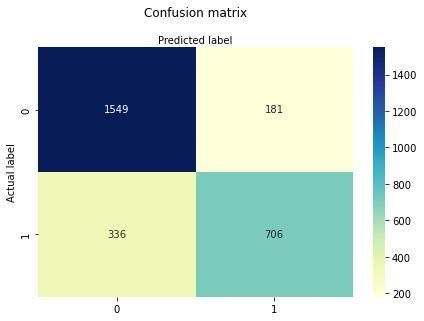

In [11]:
best_params = study.best_params
best_classifier = study.best_trial.user_attrs["best_classifier"]
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
eval(y_test, y_pred)

In [12]:
def objective(trial):
    x, y = X_train,y_train

    param = {
        "objective": "binary",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "max_dept" :trial.suggest_int("max_depth", 2, X_train.shape[1]),
        "max_features" : trial.suggest_int("max_features", 2,X_train.shape[1]),       
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    from sklearn.ensemble import GradientBoostingClassifier
    classifier_obj = GradientBoostingClassifier(random_state=0,max_features=2, max_depth=256)

    classifier_obj.fit(x, y)
    y_pred = classifier_obj.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

    if trial.should_prune() or accuracy < 0.5:
        return float('inf')
    trial.set_user_attr("best_classifier", classifier_obj)
    return 1 - accuracy   


In [ ]:
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2023-04-15 01:33:37,498] A new study created in memory with name: no-name-44eb5eb1-8b10-430e-a5d0-0a71da987037
[I 2023-04-15 01:33:42,256] Trial 0 finished with value: 0.09379509379509376 and parameters: {'max_depth': 30, 'max_features': 31, 'num_leaves': 125, 'feature_fraction': 0.5242091037039016, 'bagging_fraction': 0.8229856873499116, 'bagging_freq': 2, 'min_child_samples': 65}. Best is trial 0 with value: 0.09379509379509376.
[I 2023-04-15 01:33:47,014] Trial 1 finished with value: 0.09379509379509376 and parameters: {'max_depth': 20, 'max_features': 30, 'num_leaves': 5, 'feature_fraction': 0.8416850774467963, 'bagging_fraction': 0.6521136719231768, 'bagging_freq': 5, 'min_child_samples': 38}. Best is trial 0 with value: 0.09379509379509376.
[I 2023-04-15 01:33:51,760] Trial 2 finished with value: 0.09379509379509376 and parameters: {'max_depth': 2, 'max_features': 10, 'num_leaves': 194, 'feature_fraction': 0.714828575506478, 'bagging_fraction': 0.7252009721619086, 'bagging_fre

In [ ]:
 print(study.best_params)

In [ ]:
best_params = study.best_params
best_classifier = study.best_trial.user_attrs["best_classifier"]
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
eval(y_test, y_pred)

In [ ]:
#2)Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [7]:
from pycaret.regression import *
s = setup(data = result, target = 'Converted', session_id=123)
best_model = compare_models()

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
tuned2 = tune_model(best_model)
tuned_predictions = predict_model(tuned2, data=X_test)
tuned_predictions.head()
evalmetric(y_test,tuned_predictions['Label'])

In [ ]:
pip install pycaret

In [ ]:
pip install autogluon

In [ ]:
#3) Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [7]:
from autogluon.tabular import TabularDataset, TabularPredictor 

ModuleNotFoundError: No module named 'autogluon.tabular'

In [ ]:
train_data = TabularDataset(train_data)
test_data = TabularDataset(test_data)

predictor = TabularPredictor(label='Converted', problem_type='binary')
predictor.fit(train_data)

y_pred = predictor.predict(test_data)

# evaluate predictions using the eval function
y_true = test_data['Converted']
eval(y_true, y_pred)

In [ ]:
predictor.fit_summary()

In [ ]:
predictor.leaderboard(df_train, silent=True)

In [ ]:
predictor.evaluate(df_test)